# Phase 3: Visualization & Reporting

## Objectives
1. Load Forecast Results
2. Visualize Forecast vs Actuals (with Confidence Intervals)
3. Analyze Residuals

In [5]:
# --- CELL 1: SETUP ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Fix Path
sys.path.append(os.path.abspath(os.path.join('..')))
from src.config import PROCESSED_DATA_PATH, FIGURES_DIR
from src.visualization.visualize import plot_forecast, plot_residuals

print("Setup Complete.")

Setup Complete.


In [6]:
# --- CELL 2: LOAD DATA ---
# Load Historical Data
df_hist = pd.read_csv(PROCESSED_DATA_PATH,parse_dates=['Date'], index_col='Date')

# Load Forecast Results (Created in Phase 2)
forecast_path = '../data/processed/forecast_results.csv'
try:
    df_forecast = pd.read_csv(forecast_path, parse_dates=['Date']) # Index might be range, so parse Date col
    df_forecast.set_index('Date', inplace=True)
    print("Forecast Data Loaded.")
except FileNotFoundError:
    print(f"Error: {forecast_path} not found. Run Phase 2 first.")

# Reconstruct Training Data (Everything before Forecast)
# NOTE: In Phase 2 we split 90/10. We can infer the split or just take the non-overlapping part.
train_data = df_hist[~df_hist.index.isin(df_forecast.index)]['Close']
print(f"Training Records: {len(train_data)}")

Forecast Data Loaded.
Training Records: 2717


Forecast plot saved to C:\VS Code\amdox-data-analytics\reports\figures\forecast_plot.png


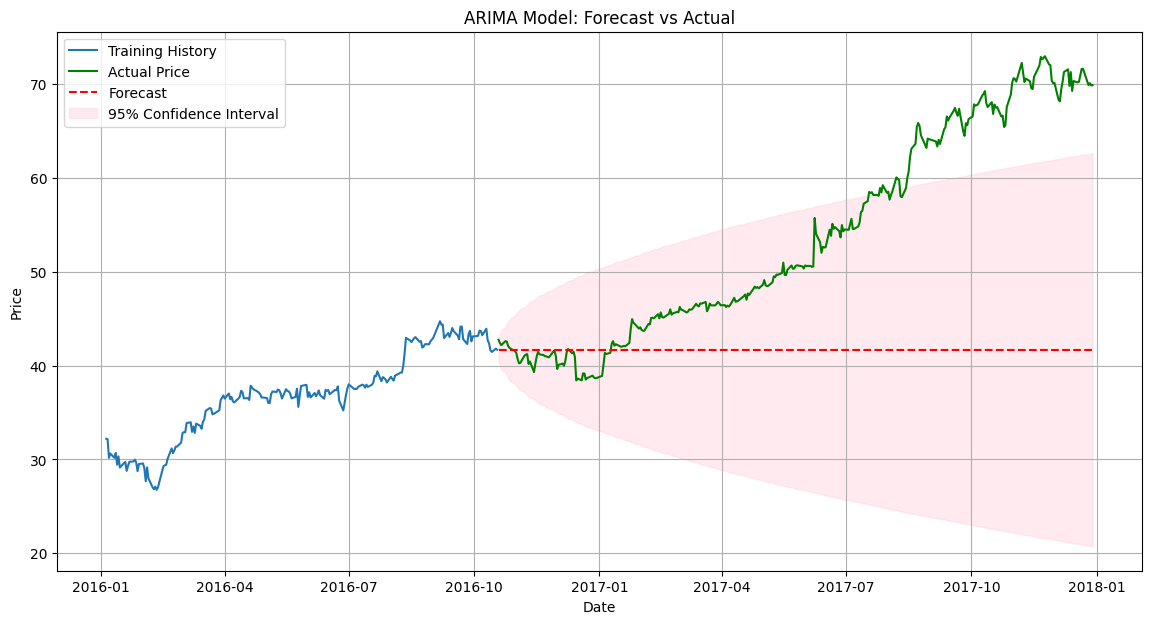

In [7]:
# --- CELL 3: VISUALIZE FORECAST ---
# Prepare inputs for the plotting function
y_test = df_forecast['Actual_Price']
y_pred = df_forecast['Predicted_Price']
conf_int = df_forecast[['Lower_Conf', 'Upper_Conf']].values

plot_forecast(train_data, y_test, y_pred, conf_int, title='ARIMA Model: Forecast vs Actual')

Residual plot saved to C:\VS Code\amdox-data-analytics\reports\figures\residual_analysis.png


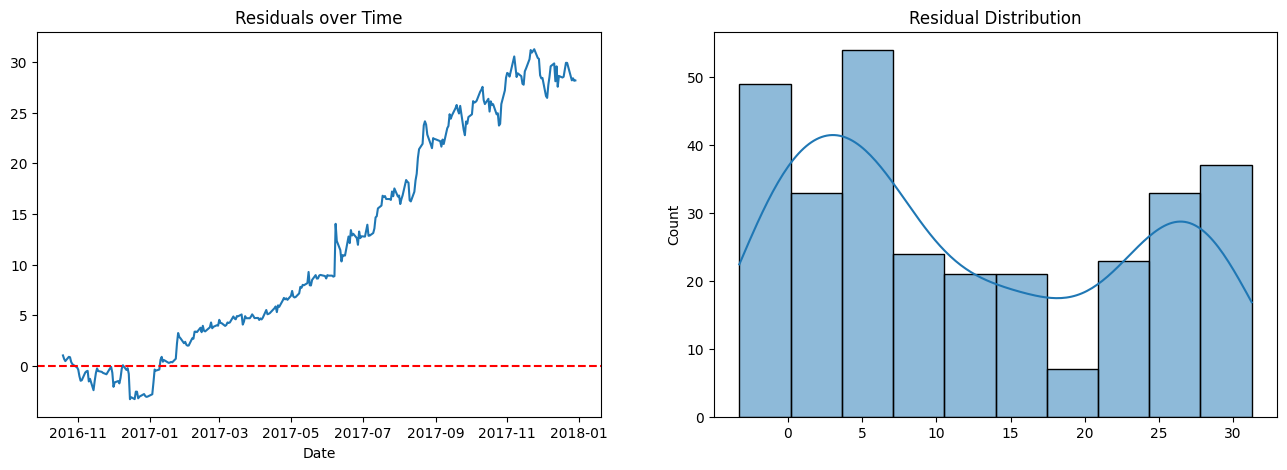

Mean Residual: 12.1277
Residual Std Dev: 10.9575


In [8]:
# --- CELL 4: RESIDUAL ANALYSIS ---
# Calculate Residuals
residuals = df_forecast['Actual_Price'] - df_forecast['Predicted_Price']

plot_residuals(residuals, title='Residual Diagnostics (Test Set)')

print(f"Mean Residual: {residuals.mean():.4f}")
print(f"Residual Std Dev: {residuals.std():.4f}")